In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

In [3]:
data.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [36]:
data.shape

(6435, 11)

In [37]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
Year            0.0
Month           0.0
Day             0.0
dtype: float64

In [38]:
data.duplicated().sum()

0

In [6]:
data.Holiday_Flag.unique()

array([0, 1], dtype=int64)

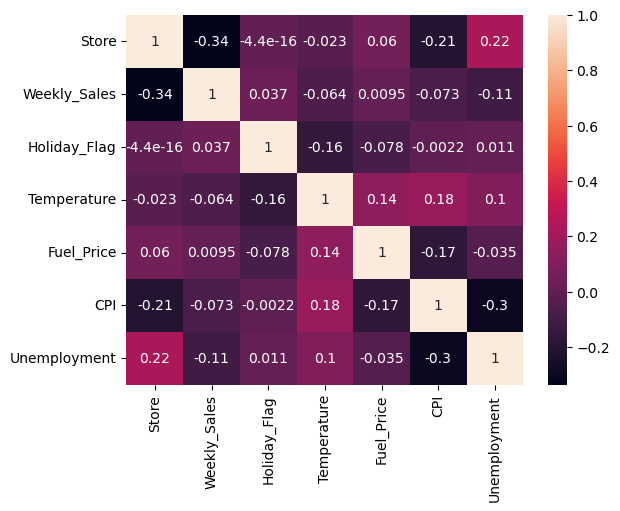

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
Holiday_Flag_1 = data.groupby(['Holiday_Flag'])['CPI','Fuel_Price'].sum()
Holiday_Flag_1

,CPI,Fuel_Price
Holiday_Flag,,
0,1.027036e+06,20160.276
1,7.707064e+04,1452.359


In [9]:
Holiday_Flag_pie= Holiday_Flag_1.reset_index(drop=True)
Holiday_Flag_pie

,CPI,Fuel_Price
0,1.027036e+06,20160.276
1,7.707064e+04,1452.359


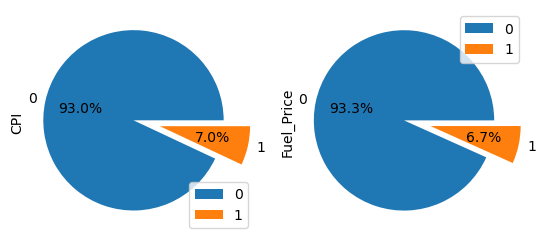

In [10]:
Holiday_Flag_pie.plot.pie(legend=True,explode=[0.1,0.2],autopct='%1.1f%%',subplots=True)
plt.show()

In [11]:
Holiday_Flag_mean = data.groupby(['Holiday_Flag'])['CPI','Fuel_Price'].mean()
Holiday_Flag_mean

,CPI,Fuel_Price
Holiday_Flag,,
0,171.601725,3.368467
1,171.268092,3.227464


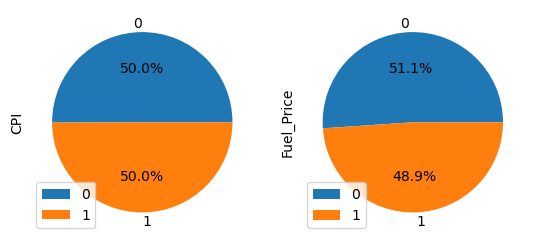

In [12]:
Holiday_Flag_mean.plot.pie(legend=True,autopct='%0.1f%%',subplots=True)
plt.show()

###### Here we only see the normal day with higher value. so, we have to find the total holydays and divide the total holyday value with the total normal day value  makes it easier to equalize holyday and non holydays . Then we can find detais about these two

In [13]:
data.Holiday_Flag.sum()

450

In [14]:
Holiday_Flag_2 = pd.DataFrame(Holiday_Flag_1)
Holiday_Flag_2.reset_index(inplace=True)
Holiday_Flag_2

,Holiday_Flag,CPI,Fuel_Price
0,0,1.027036e+06,20160.276
1,1,7.707064e+04,1452.359


In [15]:
a = list(Holiday_Flag_2.iloc[0])
a

[0.0, 1027036.3231925, 20160.276]

In [16]:
b = []
for i in a:
    c = i/14.3
    b.append(c)
print(b)

[0.0, 71820.72190157343, 1409.8095104895106]


In [17]:
h = list(Holiday_Flag_2.iloc[1])
h

[1.0, 77070.6412244, 1452.359]

In [18]:
b

[0.0, 71820.72190157343, 1409.8095104895106]

###### Here we could conform that the holydays have more CPI [77070.6412244] and sales than normal days.(fuel price is higher in holydays)

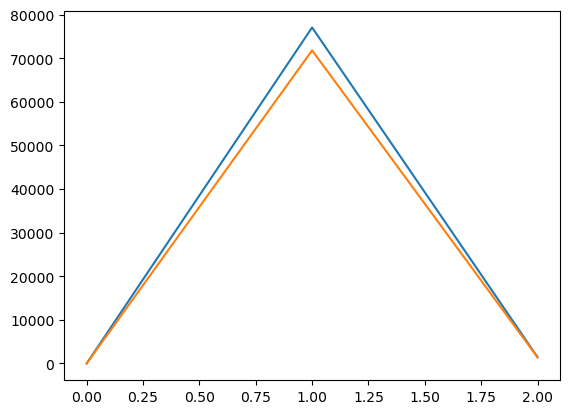

In [19]:
plt.plot(h)
plt.plot(b)
plt.show()

In [20]:
Holiday_Flag_3 = data.groupby(['Holiday_Flag'])['Weekly_Sales'].sum()
Holiday_Flag_3

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

In [21]:
"""Holiday_Flag_4 = pd.DataFrame(Holiday_Flag_3)
Holiday_Flag_4 
Holiday_Flag_4.reset_index(inplace=True)
Holiday_Flag_4"""

'Holiday_Flag_4 = pd.DataFrame(Holiday_Flag_3)\nHoliday_Flag_4 \nHoliday_Flag_4.reset_index(inplace=True)\nHoliday_Flag_4'

In [22]:
hm = Holiday_Flag_3.iloc[1]
hd = hm/1.007042253521127
hd

501765988.2623775

In [23]:
q = Holiday_Flag_3.iloc[0]
no = q/14.3
no

435798561.9265734

In [24]:
Holiday_Flag_mean1 = data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()
Holiday_Flag_mean1

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

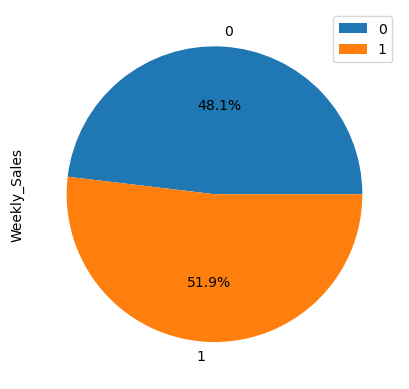

In [25]:
Holiday_Flag_mean1.plot.pie(legend=True,autopct='%0.1f%%',subplots=True);

###### Here we could conform that the weekly sales is higher is on holydays [501765988.2623775] is higher than [435798561.9265734]

In [26]:
"""no = []
for i in q:
    c = i/14.3
    no.append(c)
print(no)"""

'no = []\nfor i in q:\n    c = i/14.3\n    no.append(c)\nprint(no)'

In [27]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


### Which month does the temperature is higher?

In [29]:
temp = data.groupby(['Year','Month'])['Temperature'].mean()
temp

Year  Month
2010  1        69.868000
      2        51.804389
      3        54.115222
      4        61.594056
      5        54.495000
      6        77.451037
      7        76.204222
      8        74.354333
      9        69.911611
      10       58.164489
      11       56.856593
      12       41.715889
2011  1        45.954356
      2        53.564333
      3        59.319778
      4        50.459111
      5        69.581278
      6        69.764815
      7        68.332133
      8        73.725056
      9        64.832089
      10       63.796444
      11       46.038044
      12       49.765889
2012  1        48.775444
      2        43.604593
      3        58.910356
      4        61.777111
      5        68.468963
      6        68.559815
      7        78.899500
      8        75.952500
      9        63.617111
      10       60.796167
      11       64.838000
      12       58.342667
Name: Temperature, dtype: float64

In [30]:
Temerature_per_month  = pd.DataFrame(temp)
Temerature_per_month.reset_index(inplace=True)
Temerature_per_month

,Year,Month,Temperature
0,2010,1,69.868000
1,2010,2,51.804389
2,2010,3,54.115222
3,2010,4,61.594056
4,2010,5,54.495000
5,2010,6,77.451037
6,2010,7,76.204222
7,2010,8,74.354333
8,2010,9,69.911611
9,2010,10,58.164489


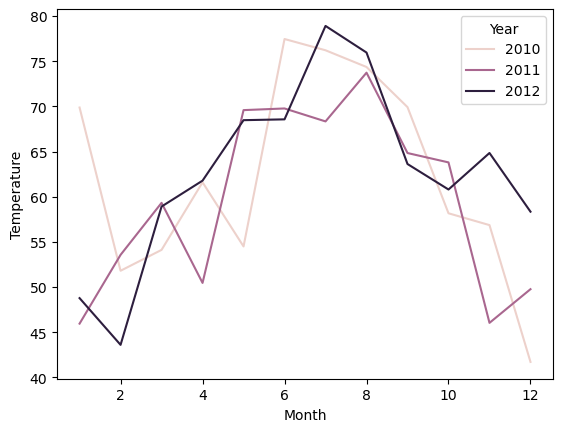

In [31]:
sns.lineplot(data=Temerature_per_month, x = 'Month',y = 'Temperature',hue='Year')
plt.show()

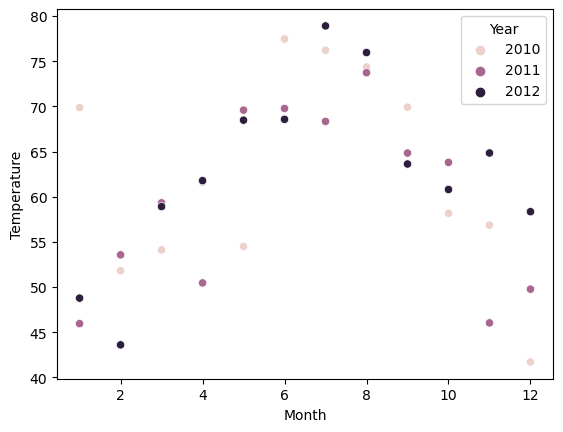

In [32]:
sns.scatterplot(data=Temerature_per_month, x = 'Month',y = 'Temperature',hue='Year')
plt.show()

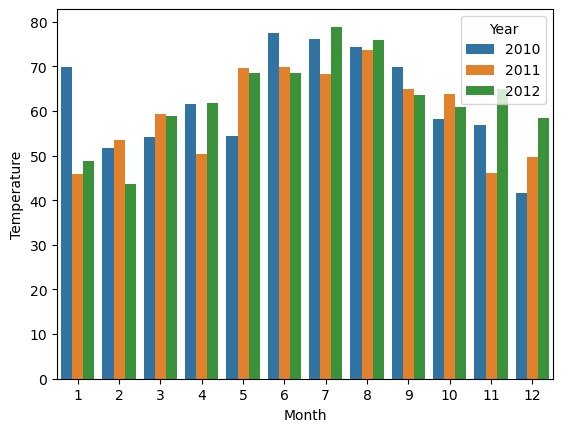

In [33]:
sns.barplot(data=Temerature_per_month, x = 'Month',y = 'Temperature',hue='Year')
plt.show()

##### From this graph we can find that the months july and august has more temerature than other months. But, in 2010 june month has atmost temperature

In [34]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [35]:
weekly_month = data.groupby(['Year','Month'])['Weekly_Sales'].mean()
weekly_month

Year  Month
2010  1        9.386639e+05
      2        1.064372e+06
      3        1.034590e+06
      4        1.021177e+06
      5        1.039303e+06
      6        1.055082e+06
      7        1.023702e+06
      8        1.025212e+06
      9        9.983559e+05
      10       1.027201e+06
      11       1.176097e+06
      12       1.198413e+06
2011  1        9.420697e+05
      2        1.042273e+06
      3        1.011263e+06
      4        1.033220e+06
      5        1.015565e+06
      6        1.038471e+06
      7        9.976049e+05
      8        1.044895e+06
      9        1.026810e+06
      10       1.020663e+06
      11       1.126535e+06
      12       1.274311e+06
2012  1        9.567817e+05
      2        1.057997e+06
      3        1.025510e+06
      4        1.014127e+06
      5        1.053948e+06
      6        1.082920e+06
      7        1.025480e+06
      8        1.064514e+06
      9        9.988663e+05
      10       1.044885e+06
      11       1.042797e+06
      12